## Exploring datasets 

In [1]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
cwd = os.getcwd()
data_dir = os.path.join(cwd, "Data")
print(os.listdir(data_dir))

['sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
files = []
for file in os.listdir(data_dir):
    data = pd.read_csv(os.path.join(data_dir,file))
    print(file, data.shape, "-------------------------------------------------------------\n", data.head(),"\n\n")


sample_submission.csv (5, 3) -------------------------------------------------------------
   Patient Id                              Genetic Disorder  \
0  PID0x6418   Mitochondrial genetic inheritance disorders   
1  PID0x25d5              Single-gene inheritance diseases   
2  PID0x4a82  Multifactorial genetic inheritance disorders   
3  PID0x4ac8   Mitochondrial genetic inheritance disorders   
4  PID0x1bf7  Multifactorial genetic inheritance disorders   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer   


test.csv (9465, 43) -------------------------------------------------------------
   Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x4175            6                     No                   Yes   
1  PID0x21f5           10                    Yes       

In [4]:
#Extract information from datasets provided

train_df = pd.read_csv(os.path.join(data_dir, "train.csv"), index_col = 0)
test_df = pd.read_csv(os.path.join(data_dir,"test.csv"), index_col = 0)

train_df.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
Patient Id,,,,,,,,,,,,,,,,,,,,,
PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [5]:
print("train frame shape: ",train_df.shape)
print("test frame shape: ", test_df.shape)

train frame shape:  (22083, 44)
test frame shape:  (9465, 42)


## Exploring training dataset 

#### Selecting target variables

In [6]:
#Selecting target variableas 
targets = train_df[["Genetic Disorder","Disorder Subclass"]].copy()
train_df.drop(["Genetic Disorder","Disorder Subclass"], axis = 1, inplace = True)

In [7]:
#Getting to wknow the classes of the target variables
print("Genetic Disorder: \n", targets["Genetic Disorder"].unique(), "\n\n")
print("Disorder Subclass: \n", targets["Disorder Subclass"].unique())

Genetic Disorder: 
 ['Mitochondrial genetic inheritance disorders' nan
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases'] 


Disorder Subclass: 
 ["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' nan "Alzheimer's"]


###### Exploring null values in targets variables

In [8]:
for var in targets.columns.tolist():
    print(f"{var} = {targets[var].isnull().sum()}" )

Genetic Disorder = 2146
Disorder Subclass = 2168


#### Cleaning data

In [9]:
# Dropping some unnecessary object_type variables like names and ages
for col in train_df.columns.tolist():
    for key_word in ["Name", "Mother", "Father", "Follow", "Parental", "Place", "Location"]:
        if key_word in  col:
            print(col)
            train_df.drop(col, axis = 1, inplace = True)

train_df.head()

Patient First Name
Family Name
Father's name
Mother's age
Father's age
Institute Name
Location of Institute
Parental consent
Follow-up
Place of birth


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,...,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
Patient Id,,,,,,,,,,,,,,,,,,,,,
PID0x6418,2.0,Yes,No,Yes,No,4.760603,Alive,Normal (30-60),Normal,0.0,...,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0
PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Deceased,Tachypnea,Normal,NaN,...,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0
PID0x4a82,6.0,Yes,No,No,No,4.893297,Alive,Normal (30-60),Tachycardia,0.0,...,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0
PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Deceased,Tachypnea,Normal,0.0,...,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0
PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Alive,Tachypnea,Tachycardia,0.0,...,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN


In [10]:
#Checking some attributes like Non_Null and Dtypes from variables
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22083 entries, PID0x6418 to PID0x9332
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Status                                            22083 non-null  object 
 7   Respiratory Rate (breaths/min)                    19934 non-null  object 
 8   Heart Rate (rates/min                             19970 non-null  object 
 9   Test 1    

#### Processing missing values across the dataset 

<AxesSubplot:>

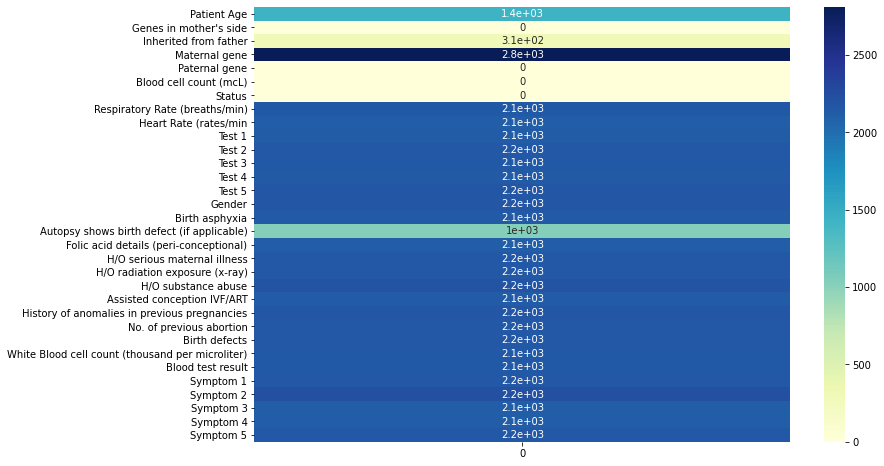

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(pd.DataFrame(train_df.isnull().sum()), annot = True, cmap = "YlGnBu")

In [12]:
#Replacing nan values
for col in train_df.columns.tolist():
    if train_df[col].dtypes == "O":
        mode = train_df[col].mode()[0]
        train_df[col].fillna(mode, inplace = True)
    else:
        mean = train_df[col].mean()
        train_df[col].fillna(mean, inplace = True)

For the sake of practicality, it's better if I encode the non numerical variables. 

In [13]:
#Isolating and enconding object-type variables
object_vars = train_df.select_dtypes(include = "O")
object_vars_numeric = pd.get_dummies(object_vars)

#Filtering and removing object-type variables from train_df
train_df = train_df.select_dtypes(include = "float64")

#Concatenating train_df and encoded dataframe
train_df = pd.concat((train_df, object_vars_numeric), axis = 1)
train_df

,Patient Age,Blood cell count (mcL),Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,...,Assisted conception IVF/ART_No,Assisted conception IVF/ART_Yes,History of anomalies in previous pregnancies_No,History of anomalies in previous pregnancies_Yes,Birth defects_Multiple,Birth defects_Singular,Blood test result_abnormal,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal
Patient Id,,,,,,,,,,,,,,,,,,,,,
PID0x6418,2.0,4.760603,0.0,0.0,0.0,1.0,0.0,2.003062,9.857562,1.0,...,1,0,0,1,0,1,0,0,0,1
PID0x25d5,4.0,4.910669,0.0,0.0,0.0,1.0,0.0,2.003062,5.522560,1.0,...,1,0,0,1,1,0,0,0,1,0
PID0x4a82,6.0,4.893297,0.0,0.0,0.0,1.0,0.0,4.000000,7.486224,0.0,...,0,1,0,1,0,1,0,0,1,0
PID0x4ac8,12.0,4.705280,0.0,0.0,0.0,1.0,0.0,1.000000,7.919321,0.0,...,0,1,0,1,0,1,0,1,0,0
PID0x1bf7,11.0,4.720703,0.0,0.0,0.0,1.0,0.0,4.000000,4.098210,0.0,...,0,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PID0x5598,4.0,5.258298,0.0,0.0,0.0,1.0,0.0,3.000000,6.584811,0.0,...,0,1,1,0,1,0,0,1,0,0
PID0x19cb,8.0,4.974220,0.0,0.0,0.0,1.0,0.0,2.000000,7.041556,1.0,...,0,1,1,0,1,0,0,1,0,0
PID0x3c4f,8.0,5.186470,0.0,0.0,0.0,1.0,0.0,2.000000,7.715464,0.0,...,1,0,1,0,0,1,0,0,1,0


In [14]:
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

def get_scores(target_name):
    """ In this function """
    
    pre_df = train_df.copy()
    pre_df[target_name] = targets[target_name] #Inserting target variable
    df = pre_df[pre_df[target_name].notnull()] #Dropping rows whose target value is NaN
    
    X = df[np.array(df.columns)[df.columns != target_name]]
    y = df[target_name]
    
    #label-encoding target variable
    le = LabelEncoder()
    le.fit(y)
    X[target_name] = le.transform(y)
    y = X[target_name]
    original_val_names = le.inverse_transform(y.unique())
    original_val_names = pd.DataFrame({"Encoded": y.unique(), "Names": le.inverse_transform(y.unique())})
    
    #Performing recursive variable elimination based in the algorithm
    dtc = DecisionTreeClassifier()
    rfe = RFE(estimator = dtc, n_features_to_select = 5, step = 1)
    rfe.fit(X, y)  
    vars_to_retain = rfe.get_support(1)
    X = X.iloc[:,vars_to_retain]
    
    
    depths = [n for n in range(1,5)]
    mean_accuracies = []
    for depth in depths:
        dt = DecisionTreeClassifier(max_depth = depth)
        cv = ShuffleSplit(test_size = 0.3)
        mean_accuracy = cross_val_score(estimator = dt, X = X, y = y, cv = cv, scoring = "accuracy").mean()
        mean_accuracies.append(mean_accuracy)
    print(target_name, "= ", mean_accuracies)
    plt.figure(figsize = (10,8))
    plt.plot(mean_accuracies, depths, color = "r")
    plt.title("Mean accuracies vs Max Tree depth")
    plt.ylabel("Max Depth")
    plt.xlabel("Mean accuracy")
    plt.show()
    
    return X, y, mean_accuracies, original_val_names

In [29]:
#Making predictions on test_df
from sklearn.model_selection import train_test_split

def predicting(target_name):
    X, y, accuracies, names_frame = get_scores(target_name)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
    dtc = DecisionTreeClassifier(max_depth = 4)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    print("y_pred =", y_pred)
    print("Names_frame", names_frame)
    names_dict = {}
    
    for val in range(names_frame.shape[0]):
            names_dict[names_frame.iloc[val, 0]] = names_frame.iloc[val, 1]
    print(names_dict)
    for row in range(names_frame.shape[0]):
        value = names_frame.iloc[row,0]
        np.where(y_pred == int(value), names_dict[value], value)
    print(y_pred)

Genetic Disorder =  [0.8978769642260114, 1.0, 1.0, 1.0]


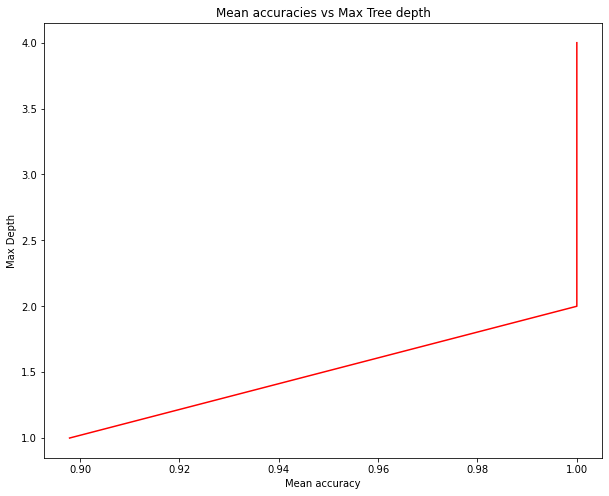

y_pred = [0 1 2 ... 0 2 0]
Names_frame    Encoded                                         Names
0        0   Mitochondrial genetic inheritance disorders
1        1  Multifactorial genetic inheritance disorders
2        2              Single-gene inheritance diseases
{0: 'Mitochondrial genetic inheritance disorders', 1: 'Multifactorial genetic inheritance disorders', 2: 'Single-gene inheritance diseases'}
[0 1 2 ... 0 2 0]
Disorder Subclass =  [0.47886192468619254, 0.7955481171548117, 0.8855062761506275, 0.961857740585774]


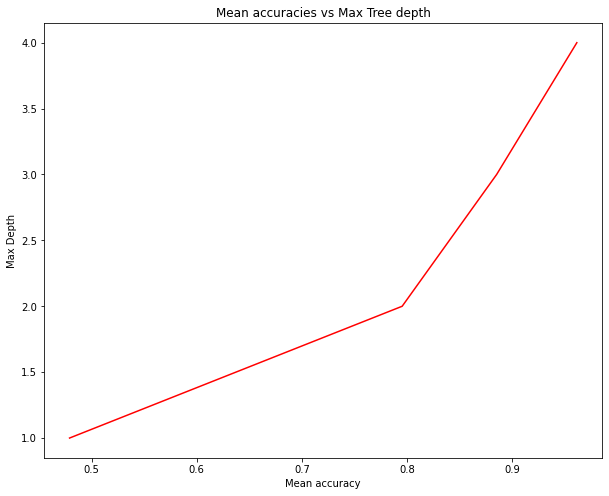

y_pred = [8 7 7 ... 8 7 2]
Names_frame    Encoded                                Names
0        5  Leber's hereditary optic neuropathy
1        2                      Cystic fibrosis
2        3                             Diabetes
3        6                       Leigh syndrome
4        1                               Cancer
5        8                            Tay-Sachs
6        4                      Hemochromatosis
7        7               Mitochondrial myopathy
8        0                          Alzheimer's
{5: "Leber's hereditary optic neuropathy", 2: 'Cystic fibrosis', 3: 'Diabetes', 6: 'Leigh syndrome', 1: 'Cancer', 8: 'Tay-Sachs', 4: 'Hemochromatosis', 7: 'Mitochondrial myopathy', 0: "Alzheimer's"}
[8 7 7 ... 8 7 2]


In [30]:
for target in targets.columns.tolist():
               predictions = predicting(target)
               #print("predictions= ", predictions, "\n----------------------------------------------------------------------------------------\n")